In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.signal import convolve2d
from scipy.optimize import leastsq
from astropy.time import Time

from tqdm import tqdm

from pathlib import Path
BASE = Path('').resolve().parent
BASE

PosixPath('/home/zheng/Documents/PIA2023a')

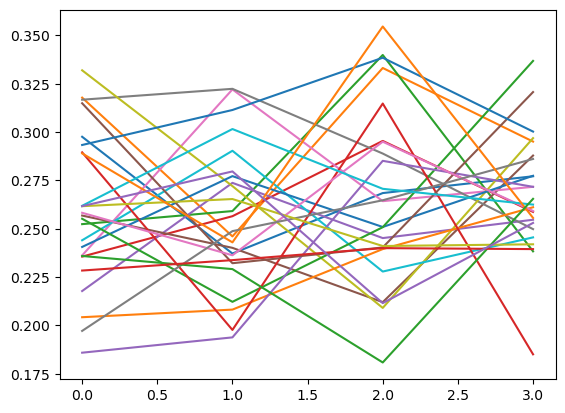

In [3]:
df = pd.read_csv(BASE / 'my_data' / 'gain' / 'mst1_20230507_test_3000_3050_5000_50500040_0050_0040_0050.csv')
plt.figure()
for i in range(0, 50, 10):
    for j in range(0, 50, 10):
        block_select = df[(df['w_st'] == i) & (df['h_st'] == j)]
        plt.plot(block_select.idx_img, block_select.gain, '-')
plt.show()
plt.close()

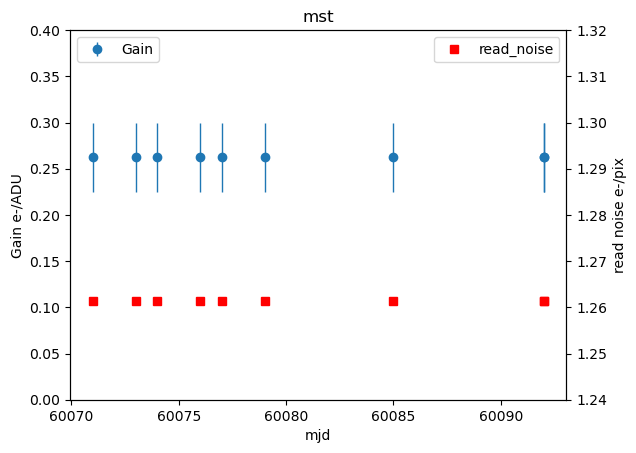

In [12]:
def datestr_trans(s):
    return '-'.join([s[:4], s[4:6], s[6:8]])

fig = plt.figure()
ax = fig.add_subplot(111)

mjd_lst = []
gain_lst = []
gain_std_lst = []
rn_lst = []
for fpath in (BASE / 'my_data' / 'gain').glob('*.csv'):
    prefix = fpath.stem
    if not prefix.startswith('mst'):
        continue
    this_df = pd.read_csv(fpath)
    datestr = prefix.split('_')[1]
    datemjd = Time(datestr_trans(datestr)).to_value(format='mjd', subfmt='float')
    mjd_lst.append(datemjd)
    gain_lst.append(np.mean(df.gain))
    gain_std_lst.append(np.std(df.gain))
    rn_lst.append(np.mean(df.read_noise))

ax.errorbar(mjd_lst, gain_lst, yerr=gain_std_lst, marker='o', linewidth=0, elinewidth=1, label='Gain')
ax2 = ax.twinx()
ax2.plot(mjd_lst, rn_lst, 'rs', label='read_noise')
ax2.set_ylabel('read noise e-/pix')
ax2.set_ylim([1.24, 1.32])
ax.set_xlabel('mjd')
ax.set_ylabel('Gain e-/ADU')
ax.set_ylim([0, 0.4])
ax.set_title('mst')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
plt.close()
    

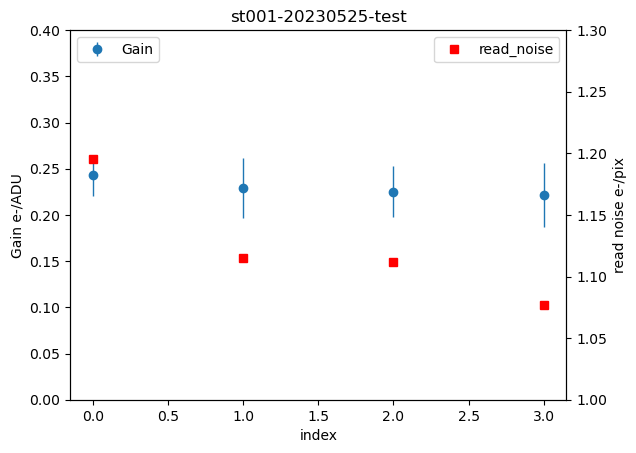

In [25]:
def datestr_trans(s):
    return '-'.join([s[:4], s[4:6], s[6:8]])

fig = plt.figure()
ax = fig.add_subplot(111)

for fpath in (BASE / 'my_data' / 'gain').glob('*.csv'):
    prefix = fpath.stem
    if not prefix.startswith('mst'):
        continue
    this_df = pd.read_csv(fpath)
    data_idx_lst = list(filter(lambda i: i in this_df.idx_img.to_list(), range(30)))
    
    mjd_lst = []
    gain_lst = []
    gain_std_lst = []
    rn_lst = []
    for idx in data_idx_lst:
        sub_df = this_df[this_df.idx_img == idx]
        gain_mean = np.mean(sub_df.gain)
        gain_std = np.std(sub_df.gain)
        read_noise = np.mean(sub_df.read_noise)
        gain_lst.append(gain_mean)
        gain_std_lst.append(gain_std)
        rn_lst.append(read_noise)
        mjd_lst.append(idx)
    if len(mjd_lst) > 4:
        break

ax.errorbar(mjd_lst, gain_lst, yerr=gain_std_lst, marker='o', linewidth=0, elinewidth=1, label='Gain')
ax2 = ax.twinx()
ax2.plot(mjd_lst, rn_lst, 'rs', label='read_noise')
ax2.set_ylabel('read noise e-/pix')
ax2.set_ylim([1.00, 1.30])
ax.set_xlabel('index')
ax.set_ylabel('Gain e-/ADU')
ax.set_ylim([0, 0.4])
ax.set_title(fpath.stem.split('_')[0])
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()
plt.close()
    

In [29]:
df_st = pd.read_csv('/home/zheng/Documents/PIA2023a/my_data/gain/st001-20230525-test_4950_5000_4950_50000040_0050_0040_0050.csv')
df_st.gain.mean(), df_st.read_noise.mean()

(0.214355623152124, 3.391846423062675)

In [30]:
df_mst = pd.read_csv('/home/zheng/Documents/PIA2023a/my_data/gain/mst1_20230512_test_3000_3050_5000_50500040_0050_0040_0050.csv')
df_mst.gain.mean(), df_mst.read_noise.mean()

(0.2502060826358425, 1.161793111238443)